# Test of Faster CRNN
Reference: [Code With Aarohi](https://www.youtube.com/watch?v=AOosZVrTUbQ)

In [5]:
# Initialize torchvision loading pre trained model based on COCO dataset https://cocodataset.org

# loading model faster rcnn and backbone resnet50 for feature extration
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# load the model already trainned 
object_detection_model = fasterrcnn_resnet50_fpn(weights=True)
object_detection_model.eval() 

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

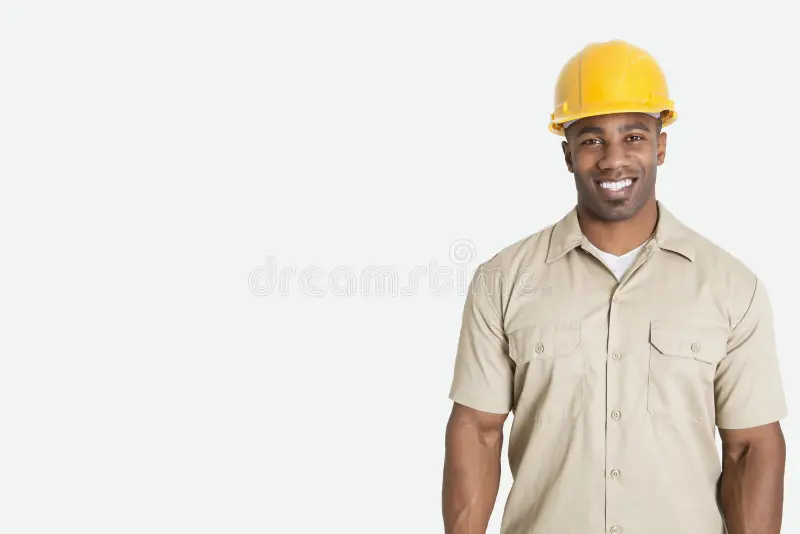

In [10]:
from PIL import Image

# Load image just for show
test_img = Image.open("../datasets/man-hard-hat.jpg")

test_img

## General Rule of working

- load image
- configure transformer to Tensor
- transform image to Tensor
- generate batches of images
- Predict

In [12]:
# To work with pytorch, we need to convert the asset to Tensor

import torchvision.transforms as transforms

# Load the image
test_img = Image.open("../datasets/man-hard-hat.jpg")

# Define the transformation - convert image to tensor
transform = transforms.Compose([
    transforms.ToTensor(),  
])

# Apply the transformation to the image
test_img_tensor = transform(test_img)
print(test_img_tensor)

#present shape
print(test_img_tensor.shape)

# create batch of images because models work on batches of images.
test_img_tensor = test_img_tensor.unsqueeze(dim=0)
print(test_img_tensor.shape)

tensor([[[0.9529, 0.9529, 0.9529,  ..., 0.9490, 0.9490, 0.9490],
         [0.9529, 0.9529, 0.9529,  ..., 0.9490, 0.9490, 0.9490],
         [0.9529, 0.9529, 0.9529,  ..., 0.9490, 0.9490, 0.9490],
         ...,
         [0.9490, 0.9490, 0.9490,  ..., 0.9412, 0.9412, 0.9412],
         [0.9490, 0.9490, 0.9490,  ..., 0.9529, 0.9529, 0.9529],
         [0.9490, 0.9490, 0.9490,  ..., 0.9529, 0.9529, 0.9529]],

        [[0.9529, 0.9529, 0.9529,  ..., 0.9569, 0.9569, 0.9569],
         [0.9529, 0.9529, 0.9529,  ..., 0.9569, 0.9569, 0.9569],
         [0.9529, 0.9529, 0.9529,  ..., 0.9569, 0.9569, 0.9569],
         ...,
         [0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
         [0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
         [0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569]],

        [[0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.9529, 0.9529],
         [0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.9529, 0.9529],
         [0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.9529, 0.

## Prediction

In [16]:

predictions = object_detection_model(test_img_tensor)

# present the number of boxes, labels and confidence scores identified
predictions


[{'boxes': tensor([[437.8529,  41.0953, 786.4391, 524.4974]], grad_fn=<StackBackward0>),
  'labels': tensor([1]),
  'scores': tensor([0.9996], grad_fn=<IndexBackward0>)}]

## Visualize results

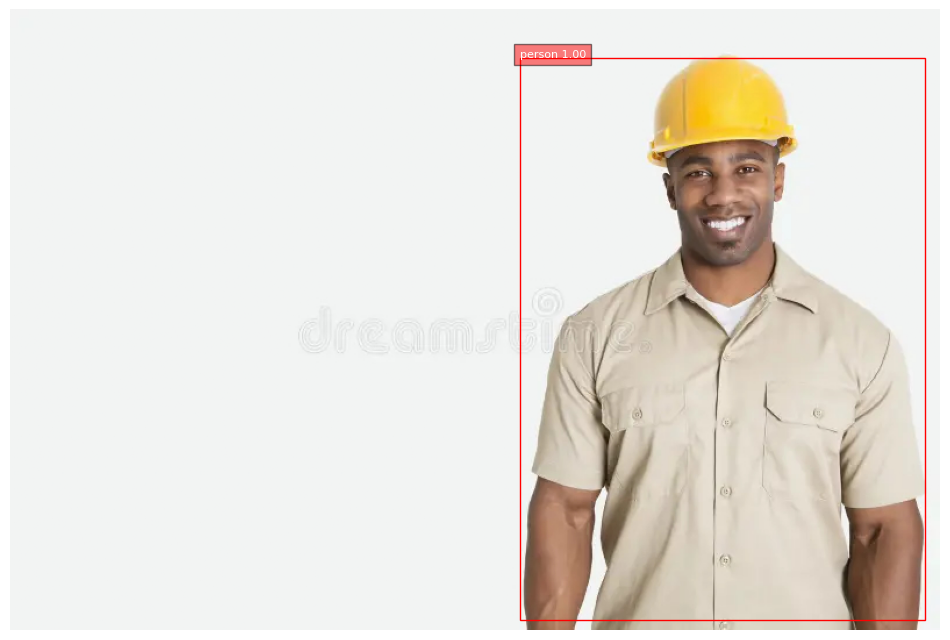

In [18]:
# COCO dataset class labels (commonly used for pre-trained models) (from tutorial)

COCO_INSTANCE_CATEGORY_NAMES = [
    '','person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


# Visualization with class names
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Convert tensor image back to numpy for visualization
img = test_img_tensor.squeeze().detach().cpu().numpy()  # Adjust dimensions as necessary
img = img.transpose(1, 2, 0)  # Rearrange the dimensions from CxHxW to HxWxC for image display

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(12, 9))

# Display the image
ax.imshow(img)

# Add bounding boxes and labels
for box, label, score in zip(predictions[0]['boxes'], predictions[0]['labels'], predictions[0]['scores']):
    x1, y1, x2, y2 = box.detach().cpu().numpy()  # Make sure to detach and convert boxes as well
    label_name = COCO_INSTANCE_CATEGORY_NAMES[label.item()]
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x1, y1, f'{label_name} {score.item():.2f}', color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')  # to turn off axes for better visualization
plt.show()